In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
df = pd.read_csv("C:\\Users\\huawei\\Desktop\\1000_Companies.csv")
print(df.head(10))

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
5  131876.90        99814.71        362861.36    New York  156991.12
6  134615.46       147198.87        127716.82  California  156122.51
7  130298.13       145530.06        323876.68     Florida  155752.60
8  120542.52       148718.95        311613.29    New York  152211.77
9  123334.88       108679.17        304981.62  California  149759.96


#### التحقق من التكرار

no duplicates.


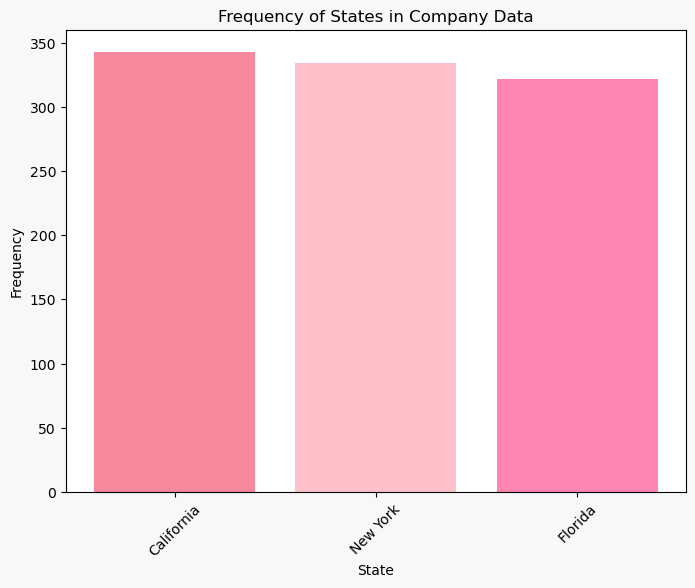

In [57]:
duplicate_rows = df.duplicated(keep=False)
num_duplicates = duplicate_rows.sum()

if num_duplicates > 0:
    print(f"duplicates: {num_duplicates}")
    print(df[duplicate_rows])
else:
    print("no duplicates.")

state_counts = df["State"].value_counts()

plt.figure(figsize=(8, 6), facecolor='#F8F8F8')
colors = ['#F7879A', 'pink', '#FF85B2', '#FFA6C9', '#E75480', '#FFD1DC']

plt.bar(state_counts.index, state_counts.values, color=colors[:len(state_counts)])
plt.xlabel("State")
plt.ylabel("Frequency")
plt.title("Frequency of States in Company Data")
plt.xticks(rotation=45)
plt.show()

#### ازالة التكرار

In [42]:
df = df.drop_duplicates()
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


#### بعد الازالة

In [45]:
duplicate_rows = df.duplicated(keep=False)
num_duplicates = duplicate_rows.sum()

if num_duplicates > 0:
    print(f"duplicates: {num_duplicates}")
    print(df[duplicate_rows])
else:
    print("no duplicates.")

state_counts = df["State"].value_counts()

no duplicates.


#### تحويل القيم الفارغة الى nan

In [48]:
#Data Cleaning
df.replace("", np.nan, inplace=True)

#### التحقق من قيم nan

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


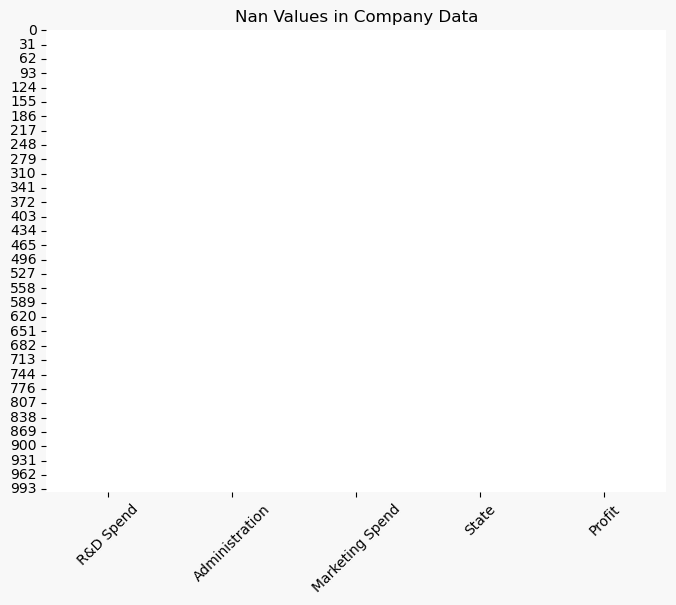

In [51]:
nan_counts = df.isna().sum()
print(nan_counts)

fig, ax = plt.subplots(figsize=(8, 6), facecolor='#F8F8F8')
cmap = sns.color_palette(["#F7879A", "#FFC0CB"], as_cmap=True)
sns.heatmap(df.isna(), cmap=cmap, cbar=False, linewidths=0.5, ax=ax)
ax.set_title("Nan Values in Company Data")
ax.set_xticklabels(df.columns, rotation=45)
plt.show()

In [53]:
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
state_encoded = encoder.fit_transform(df[['State']])
state_df = pd.DataFrame(state_encoded, columns=encoder.get_feature_names_out(['State']))

state_df.index = df.index  

X = pd.concat([df[["R&D Spend", "Administration", "Marketing Spend"]], state_df], axis=1)  
y = df["Profit"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Model R² Score: {r2:.2%}")

sample_input = [[150000, 120000, 300000] + list(state_df.iloc[0])]
prediction = model.predict(sample_input)
print(f"Predicted Profit: {prediction[0]:.2f}")

Model R² Score: 97.28%
Predicted Profit: 161446.27


C:\Users\huawei\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [55]:
df.to_csv("C:\\Users\\huawei\\Desktop\\DC\\V2.csv", index=False)